<a href="https://colab.research.google.com/github/jnqeras/emotionClassificationFromAudioSignalProcessing.ipynb/blob/main/emotionClassificationFromAudioSignalProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set-Up

Allways check that this notebook runs in a CPU: Runtime->Change Runtime 

##fixme: inicio experimento: subir dataset a drive, montar el drive e intentar trabajar en la notebook


fixme: esta celda no la escribí yo, sólo la modifiqué un poco
The next cell in necessary since this project is runned in google colab: Actually the full solution is:

0 - Set the language of google drive to english.

1 - create a new code cell and put the following code:

from google.colab import drive drive.mount('/content/gdrive', force_remount=True) root_dir = "/content/gdrive/My Drive/" base_dir = root_dir + 'emotionClassificationFromAudioSignalProcessing/dataAudio/' 2 - After that you will see a link to authorize you notebook to acess you google drive, click on it, and insert the code back in you notebook.

3 - Make shure that the path is "path = Path(base_dir) ". And not “path = Path(‘data/audios’)” in the cell that contains this code: path = Path(base_dir) dest = path/folder dest.mkdir(parents=True, exist_ok=True). fixm: ver que de esta celda, comenté dos líneas, si las termino sacando, modificar este ítem.

fixme: arreglar que este punto 4 hace referencia a los monos:
4 - open you google drive and there will be a folder “fastai-v3” where you can upload you .txt or .csv with the lists of URLs. Note: if you upload .csv files, make shure that the cells that have the following text end with ".csv" and not ".txt": folder = 'ateles_geoffroyi' file = 'urls_ateles_geoffroyi.txt'

If you follow through this, this will create a foldier in your drive called emotionClassificationFromAudioSignalProcessing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'emotionClassificationFromAudioSignalProcessing/dataAudio'

Mounted at /content/gdrive


In [2]:
#fixme: esto no se para que está, pero aparentemente es necesario
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#fixme: de acá usamos la función "Path", por lo menos 
from fastai.vision import *
from fastai.imports import *
#from fastai.metrics import *

fixme: hasta acá no se crea la carpeta. Quizás haya que crearla a mano y subir la data a la carpeta.
Agregar esta explicación de cómo tiene que ser modificada la data (sacada de solución del kaggle): first we need to convert all the files from .wav to something we can use in our neural network. We can make a list (lst) that contains the arrays of MFCC (40 dimensional vector that contains the information about audio files that we can use in training)


Now create the folder 'emotionClassificationFromAudioSignalProcessing/dataAudio' in your drive and upload the dataset to 'emotionClassificationFromAudioSignalProcessing/dataAudio'.


fixme: ahora seguir con lo que hace la solución de Kaggle. En la de kaggle tiene el dataset separado en carpetas, nosotros tenemos cada archivo con las etiquetas correspondientes, va a haber que resolver eso.

fixme: si no funciona la forma anterior de subir el datset, parece que esta es una buena forma: https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97

##fixme: fin experimento: subir dataset a drive, montar el drive e intentar trabajar en la notebook

#fixme: inicio experimento: seguir como sigue el de kaggle


In [4]:
import librosa
from librosa import display
import os
import glob 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

##Loading files

First we need to convert all the files from .wav to something we can use in our neural network. We can make a list (lst) that contains the arrays of MFCC (40 dimensional vector that contains the information about audio files that we can use in training)

This does take a while, so if you are planning to run this, feel free to take a break and make yourself a coffe while this loads (Around 900seconds)
fixme: copiado de Kaggle

In [5]:
#acá iba subirScriptConvertAColabFallido, pero lo saqué porque rompía todo.

Lets assign paths to some variables to paths of files from different datasets, so we can compare them and explore further.

fixme: copiado de kaggle


Lets explore some files.

/fixme: copiado de kagglelink text

In [6]:
path = Path(base_dir)

In [7]:
#fixme: copiado de kaggle y adaptado
#fixme: esto es medio raro porque a esta altura supuestamente ya convirtió los archivos de .wav al formato raro que usa. 
#Pero la exploración de los archivos la hace con los .wav Por lo que va a haber que subir al Drive los archivos que se referencian en esta celda.
#Add paths and get signals. 
#fixme: aca van algunos.wav

file1=path/'1001_DFA_ANG_XX.wav'
signal1, sample_rate = librosa.load(file1, sr=22050)

file2=path/'1001_DFA_FEA_XX.wav'
signal2, sample_rate = librosa.load(file2, sr=22050)

file3=path/'1001_IEO_HAP_HI.wav'
signal3, sample_rate = librosa.load(file3, sr=22050)

file4=path/'1001_IOM_DIS_XX.wav'
signal4, sample_rate = librosa.load(file4, sr=22050)


#emotion='Neutral'

##Exploration /fixme: copiado de Kaggle


Let's draw the simplest of visualisations WaveForms! 
fixme: copiado de kaggle



Text(0.5, 1.0, 'CREMA-D Waveform disgust')

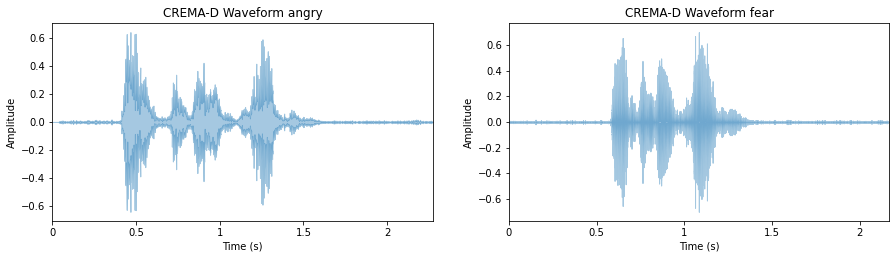

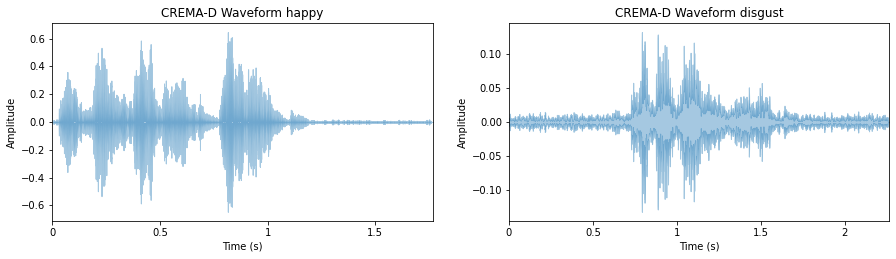

In [8]:
#fixme: copiado de kaggle y adaptado.
fig = plt.figure(figsize=(15,8))
# WAVEFORM
# display waveform
plt.subplot(2, 2, 1)
librosa.display.waveplot(signal1,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("CREMA-D Waveform angry")

plt.subplot(2, 2, 2)
librosa.display.waveplot(signal2,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("CREMA-D Waveform fear")


fig = plt.figure(figsize=(15,8))
plt.subplot(2, 2, 3)
librosa.display.waveplot(signal3,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("CREMA-D Waveform happy")

plt.subplot(2, 2, 4)
librosa.display.waveplot(signal4,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("CREMA-D Waveform disgust")

fixme: acá se puede agregar alguna observación sobre los plots.

Now lets draw the power spectrums by performing Fourier transformations!

fixme: copiado de kaggle. Averiguar que son los power spectrums y por qué me interesa plotearlos. Quizás estaría bueno plotear la waveform con los power spectrums al lado para ver la correlación de cada par.

Text(0.5, 1.0, 'CREMA-D Power spectrum disgust')

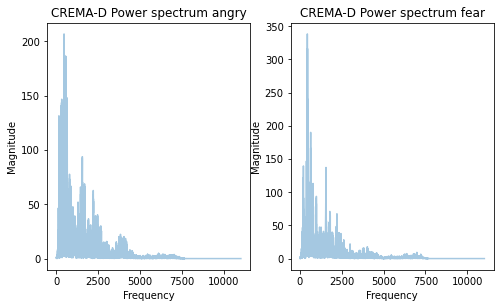

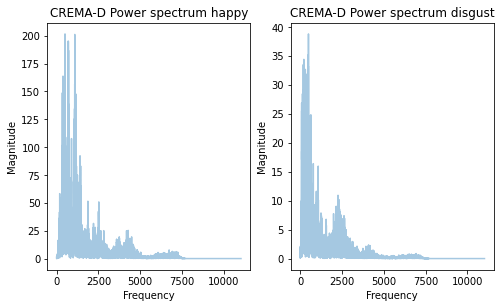

In [9]:
#fixme: copiado de kaggle y adaptado.
# FFT -> power spectrum
# perform Fourier transform
fft1 = np.fft.fft(signal1)
fft2 = np.fft.fft(signal2)
fft3 = np.fft.fft(signal3)
fft4 = np.fft.fft(signal4)

# calculate abs values on complex numbers to get magnitude
spectrum1 = np.abs(fft1)
spectrum2 = np.abs(fft2)
spectrum3 = np.abs(fft3)
spectrum4 = np.abs(fft4)

# create frequency variable
f1 = np.linspace(0, sample_rate, len(spectrum1))
f2 = np.linspace(0, sample_rate, len(spectrum2))
f3 = np.linspace(0, sample_rate, len(spectrum3))
f4 = np.linspace(0, sample_rate, len(spectrum4))

# take half of the spectrum and frequency
left_spectrum1 = spectrum1[:int(len(spectrum1)/2)]
left_f1 = f1[:int(len(spectrum1)/2)]
# take half of the spectrum and frequency
left_spectrum2 = spectrum2[:int(len(spectrum2)/2)]
left_f2 = f2[:int(len(spectrum2)/2)]
# take half of the spectrum and frequency
left_spectrum3 = spectrum3[:int(len(spectrum3)/2)]
left_f3 = f3[:int(len(spectrum3)/2)]
# take half of the spectrum and frequency
left_spectrum4 = spectrum4[:int(len(spectrum4)/2)]
left_f4 = f4[:int(len(spectrum4)/2)]

fig = plt.figure(figsize=(8,10))
# plot spectrum
plt.subplot(2, 2, 1)
plt.plot(left_f1, left_spectrum1, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("CREMA-D Power spectrum angry")

plt.subplot(2, 2,2)
# plot spectrum
plt.plot(left_f2, left_spectrum2, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("CREMA-D Power spectrum fear")


fig = plt.figure(figsize=(8,10))

plt.subplot(2, 2, 3)
plt.plot(left_f3, left_spectrum3, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("CREMA-D Power spectrum happy")

plt.subplot(2, 2, 4)
plt.plot(left_f4, left_spectrum4, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("CREMA-D Power spectrum disgust")

Here we can see that the power spectrums aren't that different.



Lets draw the spectograms of theese files
fixme: copiado de kaggle

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.18575963718820862s


Text(0.5, 1.0, 'CREMA-D Spectrogram disgust')

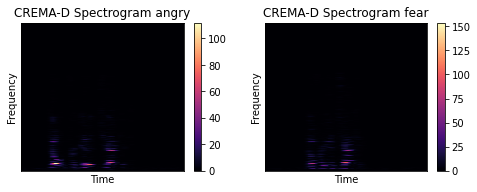

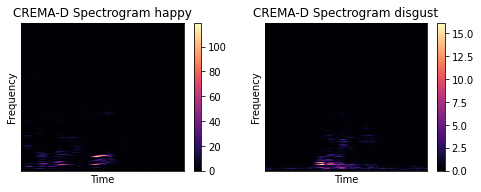

In [10]:
#fixme: copiado de kaggle y adaptado
# STFT -> spectrogram
hop_length =256 # in num. of samples
n_fft = 4096 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft1 = librosa.stft(signal1, n_fft=n_fft, hop_length=hop_length)
stft2 = librosa.stft(signal2, n_fft=n_fft, hop_length=hop_length)
stft3 = librosa.stft(signal3, n_fft=n_fft, hop_length=hop_length)
stft4 = librosa.stft(signal4, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram1 = np.abs(stft1)
spectrogram2 = np.abs(stft2)
spectrogram3 = np.abs(stft3)
spectrogram4 = np.abs(stft4)

# display spectrogram


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(spectrogram1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("CREMA-D Spectrogram angry")

plt.subplot(2, 2,2)
librosa.display.specshow(spectrogram2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("CREMA-D Spectrogram fear")


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(spectrogram3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("CREMA-D Spectrogram happy")

plt.subplot(2, 2, 4)
librosa.display.specshow(spectrogram4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("CREMA-D Spectrogram disgust")

This doesn't show much does it. Lets try to apply logarhithm to cast amplitude to decibels! #fixme: copiado de Kaggle, ver que hace esta función y por que la quiero aplicar.

In [11]:
#fixme: copiado de kaggle
log_spectrogram1 = librosa.amplitude_to_db(spectrogram1)
log_spectrogram2 = librosa.amplitude_to_db(spectrogram2)
log_spectrogram3 = librosa.amplitude_to_db(spectrogram3)
log_spectrogram4 = librosa.amplitude_to_db(spectrogram4)

Lets display Spectogramms now!

fixme: copiado de Kaggle

Text(0.5, 1.0, 'CREMA-D Spectogramm (dB) disgust')

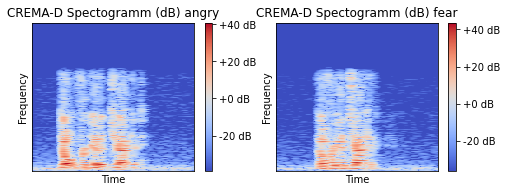

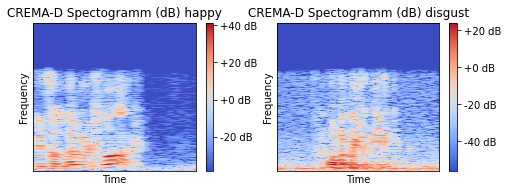

In [12]:
#fixme: copiado de kaggle y adaptado
fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(log_spectrogram1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("CREMA-D Spectogramm (dB) angry")

plt.subplot(2, 2,2)
librosa.display.specshow(log_spectrogram2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("CREMA-D Spectogramm (dB) fear")

fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(log_spectrogram3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("CREMA-D Spectogramm (dB) happy")

plt.subplot(2, 2, 4)
librosa.display.specshow(log_spectrogram4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("CREMA-D Spectogramm (dB) disgust")


Ah, much better. I've seen some classificators that use theese images as input to convolutional neural networks, so that might be a fun thing to try!
Fixme: Copiado del kaggle. Se puede intentar clasificar usando estas imágenes, como sugiere el comentario.

Now, lets actually see how the MFCC look!
fixme: copiado de Kaggle, ver que es MFCC y por qué me importa ver como se ve.


Text(0.5, 1.0, 'CREMA-D MFCCs disgust')

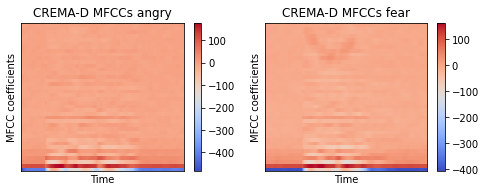

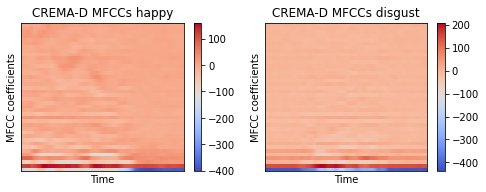

In [13]:
#fixme: copiado de kaggle y adaptado
# MFCCs
# extract 13 MFCCs
MFCCs1 = librosa.feature.mfcc(signal1, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs2 = librosa.feature.mfcc(signal2, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs3 = librosa.feature.mfcc(signal3, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs4 = librosa.feature.mfcc(signal4, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)

# display MFCCs
hop_length=256


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(MFCCs1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("CREMA-D MFCCs angry")

plt.subplot(2, 2,2)
librosa.display.specshow(MFCCs2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("CREMA-D MFCCs fear")

fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(MFCCs3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("CREMA-D MFCCs happy")


plt.subplot(2, 2, 4)
librosa.display.specshow(MFCCs4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("CREMA-D MFCCs disgust")

So that is basically the information that we are going to be inputing in our neural network! If you don't know what MFCCS are here's a wiki page - https://en.wikipedia.org/wiki/Mel-frequency_cepstrum#:~:text=Mel%2Dfrequency%20cepstral%20coefficients%20(MFCCs,%2Da%2Dspectrum%22).
fixme: copiado de Kaggle, ver por que me importa esto.

##Let's build the classificator!
fixme: copiado de kaggle


I din't add data augmentation, but that could be a fun thing to add in future versions, to see how results change!

fixme: copiado de Kaggle, considerar agregar data agumentations.

Lets make the X and y and lets split them into test and train!

fixme: copiado de Kaggle.

###fixme: acá ya tendría que estar cargada la lst, porque la siguiente celda lo usa.

Según la emoción y el nivel es el número de emoción


A = 1 Anger (ANG)
2 Disgust (DIS)
3 Fear (FEA)
4 Happy/Joy (HAP)
5 Neutral (NEU)
6 Sad (SAD)

A1 Low (LO)
A2 Medium (MD)
A3 High (HI)
A4 Unspecified (XX)

Let's load the audio files, converted to mfccs, and their emotion identifier to a list. fixme: redactar un poco mejor esto explicando que hace la siguiente celda.

In [14]:
eDic = {'ANG':'1', 'DIS':'2', 'FEA':'3', 'HAP':'4', 'NEU':'5', 'SAD':'6'}
lDic = {'LO':'1', 'MD':'2', 'HI':'3', 'XX':'4'}

lst = []
convert_path = os.path.join(path, 'convert')
onlyfiles = [f for f in os.listdir(convert_path)]

for wav_file in onlyfiles:
    path1 = os.path.join(path,'convert',wav_file[:-4] + '.npy')
    arr = np.load(path1,encoding='latin1',allow_pickle=True)
    nombre = wav_file.split('_')
    emo = nombre[2]
    level = nombre[3].split('.')[0]
    i = int(eDic.get(emo, '0')+lDic.get(level, '0'))
    arr[1] = i
    lst.append(arr)

In [15]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst) #fixme: en kaggle decía lst en vez de list. Con lst no funcionaba y no encontré esa función en ningún lado, ver si con list funciona como se espera.
#import numpy as np #fixme: esto ya está importado arriba, no debería hacer falta importarlo acá.
X = np.asarray(X)
y = np.asarray(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#As always we need to expand the dimensions, so we can input the data to NN.
x_traincnn = np.expand_dims(X_train, axis=2) 
x_testcnn = np.expand_dims(X_test, axis=2)

Some imports! Not sure if we need all of them, but i did need them at some point so maybe they stayed. If they are not needed, let me know, and ill remove them! 
fixme: copiado de Kaggle

In [16]:
#fixme: ver cuales imports no son necesarios y sacarlos. No es fundamental.
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

Let's build a simple Artificial neural network with some regularization and dropouts! Im still new to neural networks so this is definetly a sub-optimal solution! Feel free to change all of this.
fixme: copiado de kaggle

In [17]:
#fixme: este modelo es copiado de kaggle y se puede modificar para ver cómo cambian los resultados.
#Simple model

model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(40, 1)),  #fixme: la primer coordenada de imput_shape (40), tiene que coincidir con las dimenciones de
        # los MFCC (n_mfcc=40), creo que es la cantidad de muestras que se le hace al wav, si modiciamos n_mfcc, creo que tenemos que modificar esto. No borrar
        # este fixme y agregar su contenido como comentario.

        # 1st dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
        keras.layers.Dropout(0.5),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.5),

        # 3rd dense layer
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


Lets fit and visualize our training data! This does take a while.

fixme: copiado de Kaggle.

In [18]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=64, epochs=700, validation_data=(x_testcnn, y_test))

Epoch 1/700
105/105 [==============================] - 4s 6ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/700
105/105 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/700
105/105 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/700
105/105 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/700
105/105 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/700
105/105 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/700
105/105 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accura

fixme: bueno, como se puede ver abajo nuestros resultados son malísimos, hay que pulir esto.

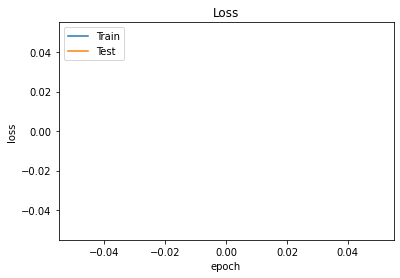

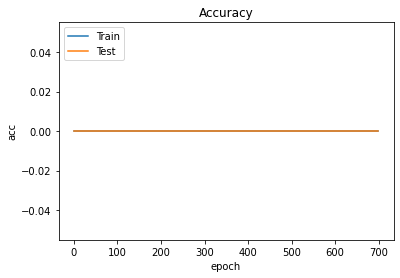

In [19]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Results!
fixme: copiado de kaggle

Lets see how we did.

Lets get a classification report and lets see in more detail which emotions are easier and which are harder to classify.

fixme: copiado de kaggle.

In [31]:
#fixme: en esta celda, sugiere usar otras funciones según la ultima capa de nuestro modelo, no cambiar hasta que no tengamos definido el modelo (uno que mas o menos funcione).
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_testcnn)
y_test = y_test.astype(int)
report = classification_report(y_test, predictions)
print(report)

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00      11.0
          12       0.00      0.00      0.00       7.0
          13       0.00      0.00      0.00       7.0
          14       0.00      0.00      0.00      87.0
          21       0.00      0.00      0.00      11.0
          22       0.00      0.00      0.00       9.0
          23       0.00      0.00      0.00      11.0
          24       0.00      0.00      0.00      97.0
          31       0.00      0.00      0.00       5.0
          32       0.00      0.00      0.00       7.0
          33       0.00      0.00      0.00      10.0
          34       0.00      0.00      0.00     113.0
          41       0.00      0.00      0.00       9.0
          42       0.00      0.00      0.00       5.0
          43       0.00      0.00      0.00      11.0
          44       0.00     

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

Let's make a classification matrix to see more in depth about classifications.

fixme: copiado de kaggle.

In [32]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print (matrix)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [ 11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [ 87   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [ 11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [ 11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [ 97   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

That looks, too boring. Lets get seaborn heatmap to help us with that!

fixme: copiado de kaggle

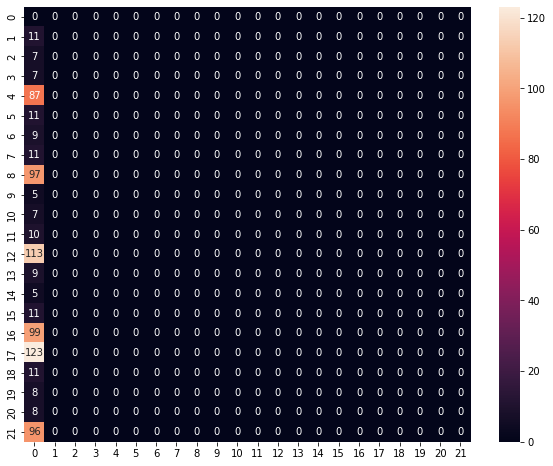

In [33]:
#fixme: cambiar este heatmap por una confusion matrix. Mostrar ejemplos de cuales se suele confundir con cuales y etc.
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, fmt="d");

fixme: observar resultados y sacar conclusiones.

#fixme: fin experimento: seguir como sigue el de kaggle


fixme: en un futuro, se puede intentar seguir este post para subir el dataset de manera más prolija: https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97